In [1]:
import pickle
import preprocessing
import learn
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import time

                 date   airline  num_code  dep_time  time_taken      stop  \
date         1.000000 -0.008188  0.004936  0.003579    0.001444 -0.001885   
airline     -0.008188  1.000000 -0.271604  0.023440    0.249983  0.118826   
num_code     0.004936 -0.271604  1.000000 -0.014270   -0.134980 -0.061468   
dep_time     0.003579  0.023440 -0.014270  1.000000    0.141720 -0.061447   
time_taken   0.001444  0.249983 -0.134980  0.141720    1.000000  0.468490   
stop        -0.001885  0.118826 -0.061468 -0.061447    0.468490  1.000000   
arr_time    -0.002045  0.144036 -0.004991 -0.154173   -0.020446  0.063100   
type        -0.007781  0.399668 -0.217631  0.039651    0.139256  0.000153   
price       -0.012626  0.428142 -0.213285  0.033017    0.205602  0.119394   
source       0.009515 -0.061232 -0.012829  0.017555   -0.064003 -0.057878   
destination -0.000247 -0.076788  0.019112 -0.034472   -0.142310 -0.122857   

             arr_time      type     price    source  destination  
date    

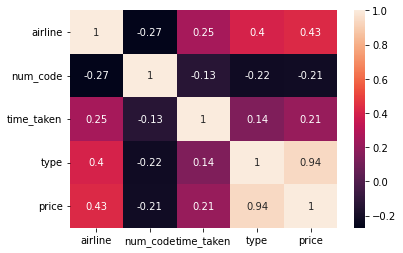

In [2]:
data = pd.read_csv('airline-price-prediction.csv')
data = preprocessing.preprocess(data)
top_feature = learn.correlateData(data)
Y=data['price'] #Goal
X=data[top_feature]
X = X.drop(['price'], axis = 1)

In [10]:
#GradientBoostingRegressor
start = time.time()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=10)
gbr_params = {'n_estimators': 1000,'max_depth': 3, 'learning_rate': 0.01}
gbr = GradientBoostingRegressor(**gbr_params).fit(x_train, y_train)
pred = gbr.predict(x_test)
print('GBR MSE', metrics.mean_squared_error(y_test, pred))
print('true_value = ',np.asarray(y_test)[:])
print('prediction_value = ',pred[:])
print("Time execution " ,time.time()- start)
pickle.dump(gbr, open('gbr.sav', 'wb'))

GBR MSE 29323565.241499927
true_value =  [ 6468  5276 38590 ... 65529  9092  9945]
prediction_value =  [ 3466.70438412  7034.18745205 32249.32016872 ... 59739.68009065
  5844.65538669  7783.12794836]
Time execution  126.59587669372559


In [14]:
#XGB Regressor
start = time.time()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=10)
xgb_r = xg.XGBRegressor(objective='reg:linear', n_estimators=10)
xgb_r.fit(x_train, y_train)
pred = xgb_r.predict(x_test)
print('XGB MSE', metrics.mean_squared_error(y_test, pred))
print('true_value = ',np.asarray(y_test)[0])
print('prediction_value = ',pred[0])
print("Time execution " ,time.time()- start)
pickle.dump(xgb_r, open('xgb_r.sav', 'wb'))

[07:09:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
XGB MSE 27172449.162794434
true_value =  6468
prediction_value =  3835.15
Time execution  0.5477027893066406


In [15]:
data = pd.read_csv('airline-test-samples.csv')
data = preprocessing.preprocess(data)

x_test = data[['airline', 'num_code', 'time_taken', 'type']]
y_test = data['price']

#GBR
start = time.time()
pickled_model = pickle.load(open('gbr.sav', 'rb'))
y_pred = pickled_model.predict(x_test)

print("Time execution " ,time.time()- start)
print('MSE', metrics.mean_squared_error(y_pred, y_test))
print('True value: ' + str(np.asarray(y_test)[0]))
print('Predicted value: ' + str(y_pred[0]))

Time execution  0.024338960647583008
MSE 29418887.586408257
True value: 15942
Predicted value: 7095.075258830354


In [16]:
data = pd.read_csv('airline-test-samples.csv')
data = preprocessing.preprocess(data)

x_test = data[['airline', 'num_code', 'time_taken', 'type']]
y_test = data['price']

#XGB
start = time.time()
pickled_model = pickle.load(open('xgb_r.sav', 'rb'))
y_pred = pickled_model.predict(x_test)

print("Time execution " ,time.time()- start)
print('MSE', metrics.mean_squared_error(y_pred, y_test))
print('True value: ' + str(np.asarray(y_test)[0]))
print('Predicted value: ' + str(y_pred[0]))

Time execution  0.011109590530395508
MSE 25654006.0
True value: 15942
Predicted value: 7696.109
